Exercise from Think Stats, 2nd Edition (thinkstats2.com)<br>
Allen Downey

In [7]:
%matplotlib inline

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

The code below just imports the dataframe and drops any rows that have NaN in weight or height since we cannot use those records.

In [8]:
import brfss
df = brfss.ReadBrfss()
df = df.dropna(subset=['wtkg2', 'htm3'])

Now that our data is cleaned, the cell below takes the log of the weight and computes the linear least squares fit for height as a function of the log of the weight.

In [36]:
import numpy as np
import thinkstats2

xs = np.log(df.wtkg2)
ys = df.htm3
inter, slope = thinkstats2.LeastSquares(xs, ys)
print "Intercept", inter
print "Slope", slope

Intercept 68.0232589936
Slope 23.2493214367


Our results can be interpreted as:
\begin{align}
    height &= 23.249 \times log(weight) + 68.0232
\end{align}

In the reading, Allen makes the point that we don't really know what the intercept means. This intercept means that at a weight of 0, the height is 68.0232 units but log(0) is undefined. So instead, below we take the mean of log(weight) and apply our estimated parameters.

In [37]:
print 'Mean of log(weight)', np.mean(xs)
print 'Intercept at mean of log(weight)', slope*np.mean(xs) + inter
print 'Mean of height', np.mean(ys)

Mean of log(weight) 4.34132797232
Intercept at mean of log(weight) 168.956188484
Mean of height 168.956188484


What we see above is that the intercept at the mean of log(weight) perfectly predicts the height in this dataset. This means our model is accurate close to the mean.

Now given that one of our variables is log-transformed, we have another way to represent the equation shown above which is:
\begin{align}
e^{height} &= e^{23.249} \times weight + e^{68.0232}
\end{align}

We can then use weight instead of the log of weight to calculate $e^{height}$. Below we represent the slope and the intercept when weight is 0 in this way.

In [39]:
#another way to present the parameters is to exponentiate, gives you: e^height = e^slope * weight + e^b
print 'Slope expressed as exponential of height', np.exp(slope)
print 'Intercept expressed as exponential of height', np.exp(inter)

Slope expressed as exponential of height 12504087610.8
Intercept expressed as exponential of height 3.48438408945e+29


Given the size of these values and the fact that we have probably lost some accuracy in our estimations, I think it is better to stick with the equation in its original form and use the log of weight.

In order to determine how much it would help to know a person's height in guessing their weight, I wanted to know how sampling error affects the calculated fit. I used the SamplingDistributions function given in the book and produced the 90% confidence interval for each height. To answer this question, I used height as the explanatory variable and log(weight) as the dependent variable.

In [38]:
def SamplingDistributions(df, iters=101):
    t = []
    for _ in range(iters):
        sample = thinkstats2.ResampleRows(df)
        weights = np.log(sample.wtkg2)
        heights = sample.htm3
        estimates = thinkstats2.LeastSquares(heights, weights)
        t.append(estimates)
    inters, slopes = zip(*t)
    return inters, slopes

inters, slopes = SamplingDistributions(df)

I then take the calculated intercepts and slopes and use the PlotConfidenceIntervals function. The plot is below and the x-axis is height and the y-axis is log(weight).

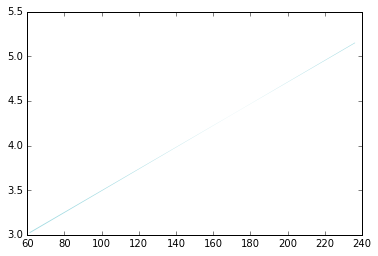

In [40]:
import thinkplot

def PlotConfidenceIntervals(xs, inters, slopes,
                            percent=90, **options):
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = thinkstats2.FitLine(xs, inter, slope)
        fys_seq.append(fys)
    p = (100 - percent) / 2
    percents = p, 100 - p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs, low, high, **options)
    thinkplot.label()


PlotConfidenceIntervals(df.htm3, inters, slopes)



What this plot shows us is that there isn't a lot of variability due to the sampling error. We see that closest to the mean height of 168, there is a lot less variability as the filled polygon is very faint. So for heights close to the mean, we should be accurately able to guess the log(weight). As we move away from the mean, there still isn't a large difference between the 5th and 95th percentiles so we should still be able to reasonably approximate log(weight). We are more likely to be wrong or more inaccurate in our guess the further we get from the mean but having height should give us a small range of weights to guess within.

## Clarifying Questions

Use this space to ask questions regarding the content covered in the reading. These questions should be restricted to helping you better understand the material. For questions that push beyond what is in the reading, use the next answer field. If you don't have a fully formed question, but are generally having a difficult time with a topic, you can indicate that here as well.

This half chapter took me a long time to get through because I feel I do not have a very strong or intuitive knowledge of statistics. I do not really know how to interpret percentile graphs like the one in the reading and although I've used the code in the book, I am not 100% confident on how the code works and how to interpret the result.

## Enrichment Questions

Use this space to ask any questions that go beyond (but are related to) the material presented in this reading. Perhaps there is a particular topic you'd like to see covered in more depth. Perhaps you'd like to know how to use a library in a way that wasn't show in the reading. One way to think about this is what additional topics would you want covered in the next class (or addressed in a followup e-mail to the class). I'm a little fuzzy on what stuff will likely go here, so we'll see how things evolve.

## Additional Resources / Explorations

If you found any useful resources, or tried some useful exercises that you'd like to report please do so here. Let us know what you did, what you learned, and how others can replicate it.